## Author : Ibrahim Sobh
## Recommender System
## MovieLens dataset

### Importing Libraries & Loading Data

In [339]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

movies_master=pd.read_csv('../data/movies.csv')
movies_data = movies_master.copy()

ratings_master=pd.read_csv('../data/ratings.csv')
ratings_data = ratings_master.copy()

## Movies Data

### Display Dataset

In [340]:
movies_data.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Describe Dataset

In [341]:
movies_data.describe(include=np.number)
## ID should be an object, This is not meaningfull

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [342]:
movies_data.describe(include=object)

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


### Check up for columns with missing Data

In [343]:
movies_data.isnull().sum().sort_values(ascending=False).head(10) / len(movies_data) *100

movieId    0.0
title      0.0
genres     0.0
dtype: float64

In [344]:
duplicate_mask =movies_data.duplicated(keep=False,subset=["title"])
movies_duplicates=movies_data[duplicate_mask]
movies_duplicates.sort_values(by="title")


,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [345]:
# movies_data.groupby(["year"]).count()
# movies_data[ movies_data["title"].str.isalpha()==True]

## Ratings Data

In [346]:
ratings_data.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [347]:
ratings_data.isnull().sum().sort_values(ascending=False).head(10) / len(ratings_data) *100

userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64

* ### No missing data were founb thus we dont need to delete anythign

### Drop Unwanted Columns ( columns with a lot of missing data)

In [348]:
ratings_data.drop(["timestamp"], axis = 1, inplace = True)

In [349]:
ratings_data.head(5)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [350]:
ratings_data["rating"].describe(include=np.number)


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [351]:
duplicate_mask =ratings_data.duplicated(keep=False,subset=["userId","movieId"])
ratings_data[duplicate_mask]

,userId,movieId,rating


In [354]:
duplicates_IDs =list(movies_duplicates.iloc[:,0].values)
raw_merge=movies_data.merge(ratings_data, on='movieId', how='left', indicator=True)
duplicated_ratings=raw_merge[raw_merge["movieId"].isin( duplicates_IDs)].groupby(["movieId","title","genres","rating"]).count()
duplicated_ratings.sort_values(by=["title","userId"])

userId  \
movieId title                                  genres                              rating           
144606  Confessions of a Dangerous Mind (2002) Comedy|Crime|Drama|Romance|Thriller 4.0          1   
6003    Confessions of a Dangerous Mind (2002) Comedy|Crime|Drama|Thriller         4.5          2   
                                                                                   4.0          3   
                                                                                   3.0          4   
                                                                                   3.5          6   
838     Emma (1996)                            Comedy|Drama|Romance                2.0          1   
                                                                                   4.5          1   
26958   Emma (1996)                            Romance                             3.5          1   
838     Emma (1996)                            Comedy|Drama|Romance                3.5          2   
                                                                                   4.0          8   
                                                                                   3.0          9   
                                                                                   5.0          9   
32600   Eros (2004)                            Drama                               3.5          1   
147002  Eros (2004)                            Drama|Romance                       4.0          1   
2851    Saturn 3 (1980)                        Adventure|Sci-Fi|Thriller           2.0          1   
                                                                                   5.0          1   
168358  Saturn 3 (1980)                        Sci-Fi|Thriller                     2.5          1   
2851    Saturn 3 (1980)                        Adventure|Sci-Fi|Thriller           3.0          2   
34048   War of the Worlds (2005)               Action|Adventure|Sci-Fi|Thriller    1.0          1   
                                                                                   5.0          1   
64997   War of the Worlds (2005)               Action|Sci-Fi                       2.5          1   
                                                                                   3.5          1   
34048   War of the Worlds (2005)               Action|Adventure|Sci-Fi|Thriller    1.5          2   
                                                                                   4.5          3   
                                                                                   2.5          6   
                                                                                   2.0          7   
                                                                                   3.0          7   
                                                                                   4.0          9   
                                                                                   3.5         14   

                                                                                           _merge  
movieId title                                  genres                              rating          
144606  Confessions of a Dangerous Mind (2002) Comedy|Crime|Drama|Romance|Thriller 4.0          1  
6003    Confessions of a Dangerous Mind (2002) Comedy|Crime|Drama|Thriller         4.5          2  
                                                                                   4.0          3  
                                                                                   3.0          4  
                                                                                   3.5          6  
838     Emma (1996)                            Comedy|Drama|Romance                2.0          1  
                                                                                   4.5          1  
26958   Emma (1996)                            Romance     

In [359]:
raw_merge.movieId=raw_merge.movieId.replace(26958,838)
raw_merge.movieId=raw_merge.movieId.replace(168358,2851)
raw_merge.movieId=raw_merge.movieId.replace(32600,147002)
raw_merge.movieId=raw_merge.movieId.replace(144606,6003)
raw_merge.movieId=raw_merge.movieId.replace(64997,34048)

In [368]:
mask=(raw_merge["title"]=="Emma (1996)")
raw_merge[mask].sort_values(by="userId")

,movieId,title,genres,userId,rating,_merge
19668,838,Emma (1996),Comedy|Drama|Romance,6.0,4.0,both
19669,838,Emma (1996),Comedy|Drama|Romance,12.0,5.0,both
19670,838,Emma (1996),Comedy|Drama|Romance,33.0,5.0,both
19671,838,Emma (1996),Comedy|Drama|Romance,57.0,3.0,both
19672,838,Emma (1996),Comedy|Drama|Romance,68.0,3.5,both
19673,838,Emma (1996),Comedy|Drama|Romance,84.0,5.0,both
19674,838,Emma (1996),Comedy|Drama|Romance,100.0,4.5,both
19675,838,Emma (1996),Comedy|Drama|Romance,104.0,4.0,both
19676,838,Emma (1996),Comedy|Drama|Romance,108.0,5.0,both
19677,838,Emma (1996),Comedy|Drama|Romance,113.0,4.0,both


<AxesSubplot:ylabel='Density'>

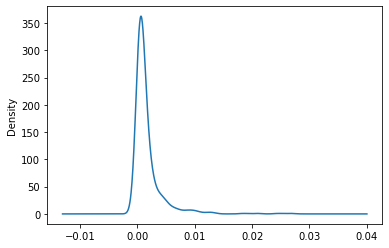

In [381]:
import matplotlib.pyplot as plt

ratings_data.userId.value_counts(normalize=True).plot(kind="kde")

<AxesSubplot:>

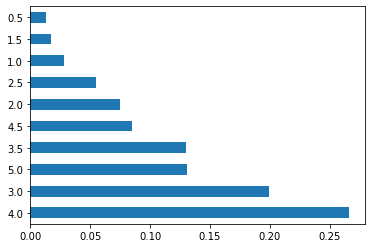

In [375]:
import matplotlib.pyplot as plt

ratings_data.rating.value_counts(normalize=True).plot(kind="barh")